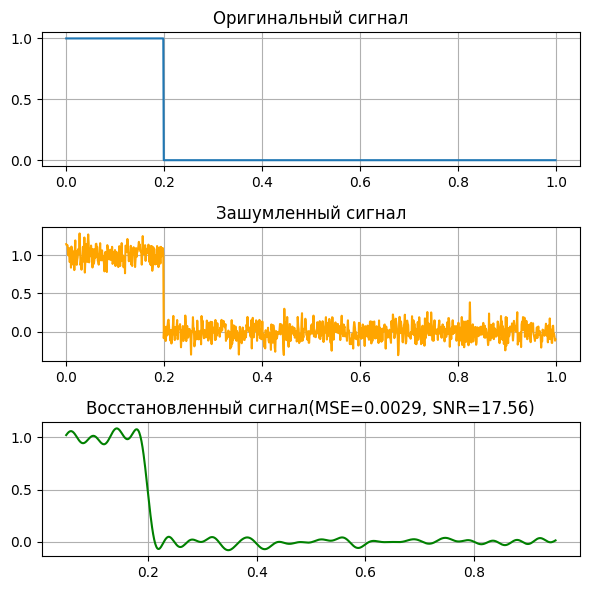

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
A = 1  # амплитуда
T = 0.2  # длительность импульса (в долях от общего времени)
N = 1024  # количество точек дискретизации
noise_std = 0.1  # стандартное отклонение шума
t = np.linspace(0, 1, N, endpoint=False)  # временная шкала

# Генерация прямоугольного импульса x(t)
x = np.zeros(N)
x[:int(T*N)] = A

# Добавление шума
noise = np.random.normal(0, noise_std, N)
y = x + noise # зашумленный сигнал x(t)

# Прямое ДПФ
Y = np.fft.fft(y)

# Фильтрация: отсекаем частоты, которые выше заданного порога
cutoff = 25
Y_filtered = np.copy(Y)
Y_filtered[cutoff:-cutoff] = 0

# Обратное ДПФ
x_reconstructed_full = np.fft.ifft(Y_filtered).real

# Обрежем края, так как из-за возникающих пограничных эффектов качество уменьшается
trim_size = 50
x_reconstructed = x_reconstructed_full[trim_size:-trim_size]
x_trimmed = x[trim_size:-trim_size]
t_trimmed = t[trim_size:-trim_size]

# Метрики восстановления
mse = np.mean((x_reconstructed-x_trimmed)**2)
snr = 10 * np.log10(np.sum(x_trimmed**2) / np.sum((x_trimmed - x_reconstructed)**2))

# Визуализация
plt.figure(figsize=(6, 6))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Оригинальный сигнал')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, y, color='orange')
plt.title('Зашумленный сигнал')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t_trimmed, x_reconstructed, color='green')
plt.title(f'Восстановленный сигнал(MSE={mse:.4f}, SNR={snr:.2f})')
plt.grid()

plt.tight_layout()
plt.show()